In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
application_train = pd.read_csv('application_train.csv')

# Displaying Dataset details
print("Training set shape:", application_train.shape)

application_train.head()

Training set shape: (23282, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Checking for null values count in each column
application_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,3114
AMT_REQ_CREDIT_BUREAU_WEEK,3114
AMT_REQ_CREDIT_BUREAU_MON,3114
AMT_REQ_CREDIT_BUREAU_QRT,3114


In [4]:
numeric_columns = application_train.select_dtypes(include=['number']).columns

# Checking for null values in numeric columns only
missing_in_numeric = application_train[numeric_columns].isnull().sum()

# Printing columns with null values count
print(missing_in_numeric)


SK_ID_CURR                       0
TARGET                           0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3114
AMT_REQ_CREDIT_BUREAU_WEEK    3114
AMT_REQ_CREDIT_BUREAU_MON     3114
AMT_REQ_CREDIT_BUREAU_QRT     3114
AMT_REQ_CREDIT_BUREAU_YEAR    3114
Length: 106, dtype: int64


In [5]:
# Replacing null values with mean in numeric columns
for col in numeric_columns:
    mean_value = application_train[col].mean()
    application_train[col].fillna(mean_value, inplace=True)

<ipython-input-5-bb2eb776b303>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_train[col].fillna(mean_value, inplace=True)


In [6]:
numeric_columns = application_train.select_dtypes(include=['number']).columns

missing_in_numeric = application_train[numeric_columns].isnull().sum()

# printing to confirm all numeric null values are replaced with mean
print(missing_in_numeric)

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 106, dtype: int64


In [7]:
object_columns = application_train.select_dtypes(include=['object']).columns

# Checking for null values in object columns
missing_in_object = application_train[object_columns].isnull().sum()

# Printing columns with null values count in object columns
print(missing_in_object)

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                  98
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE                7248
WEEKDAY_APPR_PROCESS_START        1
ORGANIZATION_TYPE                 1
FONDKAPREMONT_MODE            15952
HOUSETYPE_MODE                11634
WALLSMATERIAL_MODE            11821
EMERGENCYSTATE_MODE           10992
dtype: int64


In [8]:
# Replacing null values with mean in object columns
for col in object_columns:
    mode_value = application_train[col].mode()[0]
    application_train[col].fillna(mode_value, inplace=True)


<ipython-input-8-7ae18f51bcd7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_train[col].fillna(mode_value, inplace=True)


In [9]:
object_columns = application_train.select_dtypes(include=['object']).columns

missing_in_object = application_train[object_columns].isnull().sum()

# printing to confirm all object null values are replaced with mode
print(missing_in_object)

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64


In [10]:
# Segregating target from training data
X = application_train.drop('TARGET', axis=1)
y = application_train['TARGET']

print(X.shape)

(23282, 121)


In [11]:
# One-hot encoding
train_encode = pd.get_dummies(X, drop_first=True)

In [12]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_encode)

In [13]:
from sklearn.model_selection import train_test_split

X = train_scaled
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 225)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          57,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,329 (388.00 KB)

 Trainable params: 99,201 (387.50 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7303 - loss: 0.5629 - val_accuracy: 0.9167 - val_loss: 0.2728
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9179 - loss: 0.2796 - val_accuracy: 0.9167 - val_loss: 0.2611
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9171 - loss: 0.2679 - val_accuracy: 0.9163 - val_loss: 0.2582
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.2605 - val_accuracy: 0.9167 - val_loss: 0.2606
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.2488 - val_accuracy: 0.9167 - val_loss: 0.2624
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9187 - loss: 0.2448 - val_accuracy: 0.9163 - val_loss: 0.2624
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.2344 - val_accuracy: 0.9158 - val_loss: 0.2626
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9192 - loss: 0.2314 - val_accuracy: 

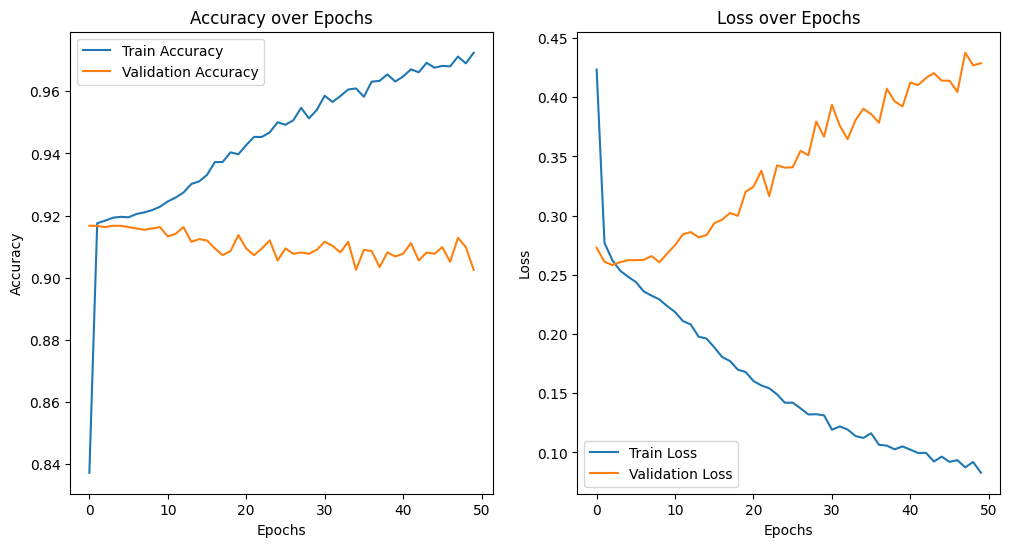

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Conv1D, MaxPooling1D, Flatten, Attention, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Step 3: Define the CNN model architecture
input_layer = Input(shape=(X_train.shape[1],))  # X_train.shape[1] is the number of features

# Fully connected layers (Dense layers)
x = Dense(256, activation='relu')(input_layer)  # First dense layer with 256 neurons
x = Dropout(0.3)(x)  # Dropout layer for regularization

x = Dense(128, activation='relu')(x)  # Second dense layer with 128 neurons
x = Dropout(0.3)(x)  # Dropout layer for regularization

x = Dense(64, activation='relu')(x)  # Third dense layer with 64 neurons
x = Dropout(0.2)(x)  # Dropout layer for regularization

# Batch normalization (can help with training stability)
x = BatchNormalization()(x)

# Output layer (binary classification: loan repayment prediction)
output_layer = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Step 4: Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy}")

# Optionally, save the model for later use
# model.save('loan_repayment_model.h5')

# Step 8: Visualize training progress (accuracy and loss over epochs)
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix, accuracy_score

y_pred_prob = model.predict(X_test)  # Predicted probabilities (between 0 and 1)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))





73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2135
           1       0.22      0.07      0.10       194

    accuracy                           0.90      2329
   macro avg       0.57      0.52      0.53      2329
weighted avg       0.86      0.90      0.88      2329



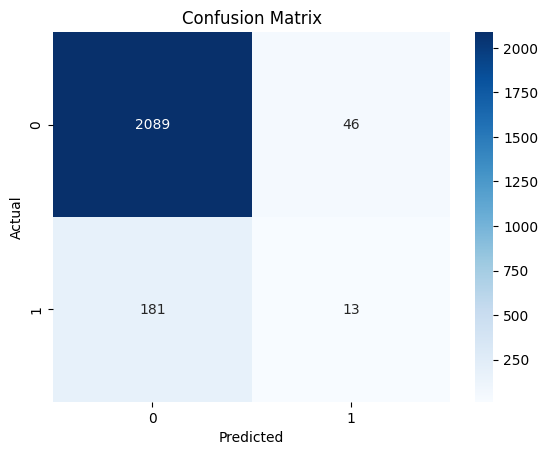

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

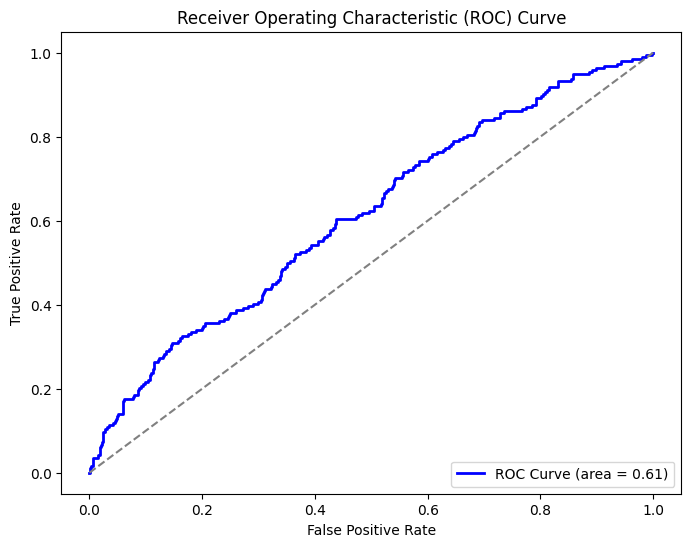

In [17]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # fpr = false positive rate, tpr = true positive rate
roc_auc = auc(fpr, tpr)  # Area under the ROC curve

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

# random Forest
random_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [19]:
from sklearn.metrics import accuracy_score

# Fit the model
random_model.fit(X_train, y_train)

# Make predictions
y_pred = random_model.predict(X_test)

# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9167024474023185


In [20]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2135
           1       0.00      0.00      0.00       194

    accuracy                           0.92      2329
   macro avg       0.46      0.50      0.48      2329
weighted avg       0.84      0.92      0.88      2329



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


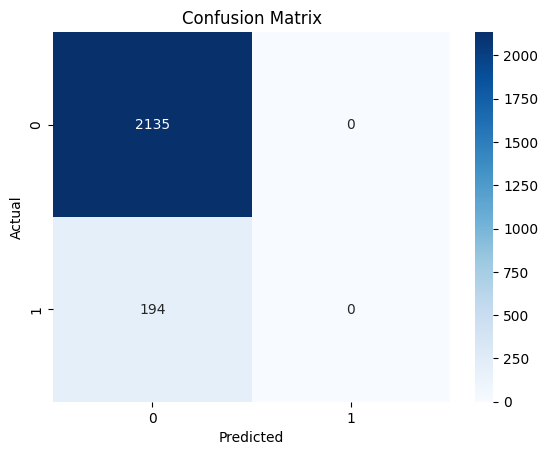

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

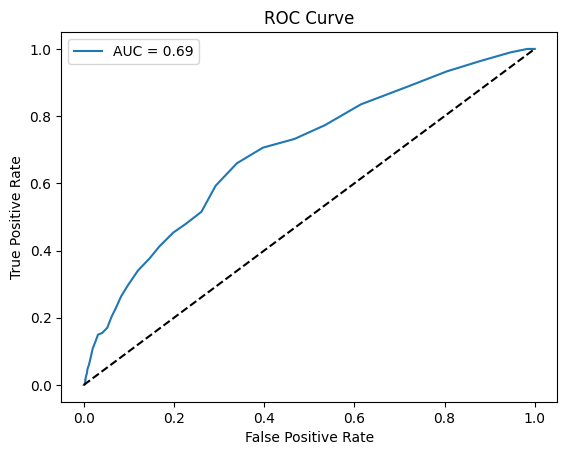

In [22]:
# plot ROC Curve
y_pred_prob = random_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model =  LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Accuracy: 0.9158437097466724


In [25]:
# classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2135
           1       0.33      0.01      0.02       194

    accuracy                           0.92      2329
   macro avg       0.63      0.50      0.49      2329
weighted avg       0.87      0.92      0.88      2329



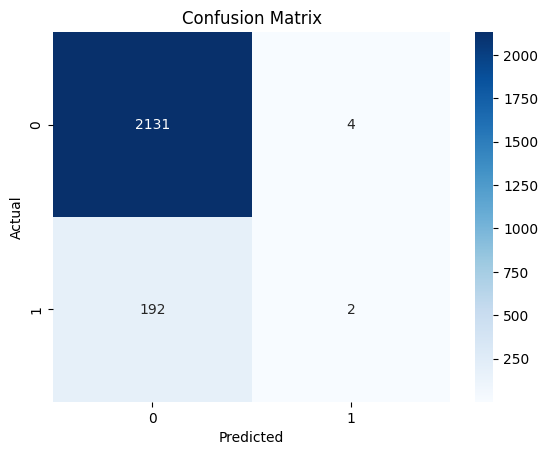

In [26]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

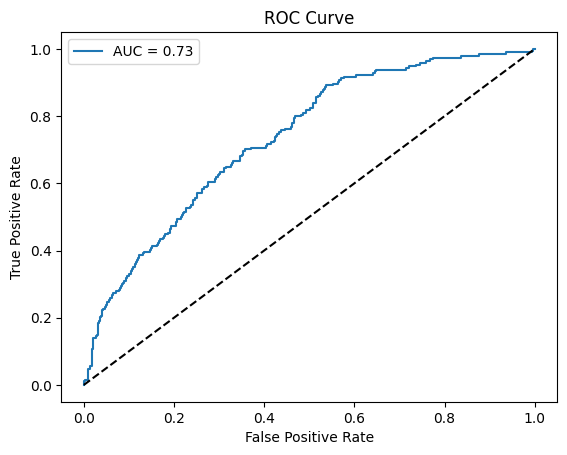

In [27]:
# plot ROC Curve
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_logistic)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob_logistic):.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# Make predictions
y_pred = knn_model.predict(X_test)

# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9089738085015028


In [30]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2135
           1       0.09      0.01      0.02       194

    accuracy                           0.91      2329
   macro avg       0.50      0.50      0.49      2329
weighted avg       0.85      0.91      0.87      2329



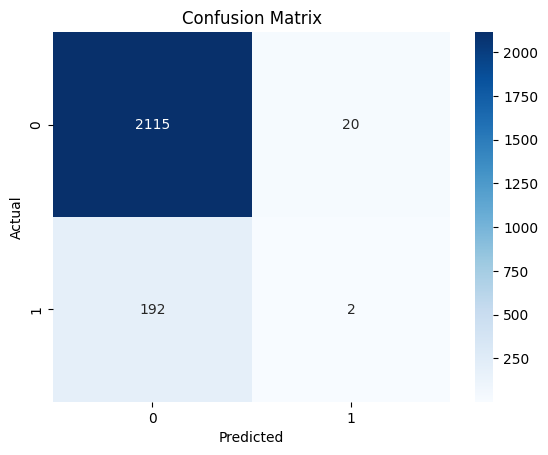

In [31]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

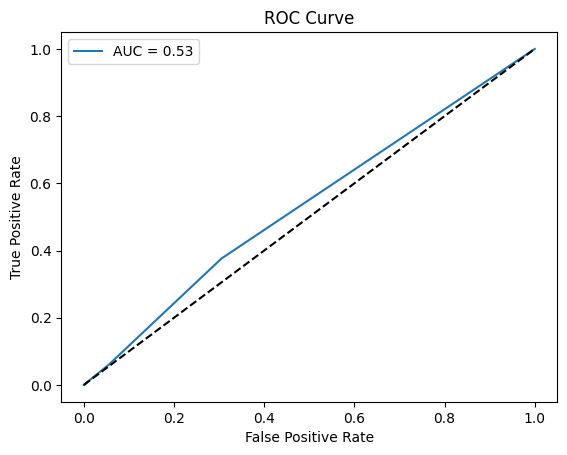

In [32]:
# plot ROC Curve
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

In [33]:
# SVM

from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=10000, tol=1e-4)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [34]:
# Accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9167024474023185


In [35]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2135
           1       0.00      0.00      0.00       194

    accuracy                           0.92      2329
   macro avg       0.46      0.50      0.48      2329
weighted avg       0.84      0.92      0.88      2329



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


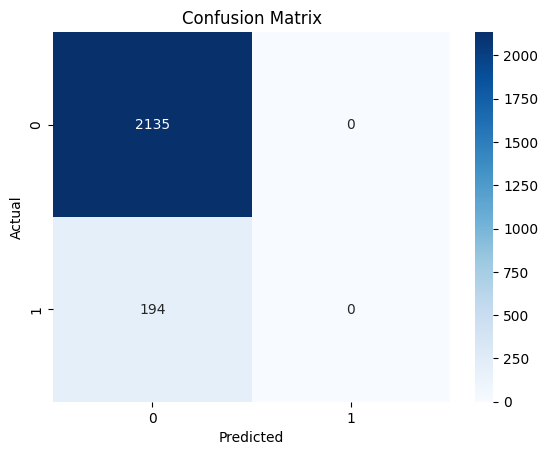

In [36]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

plt.show()

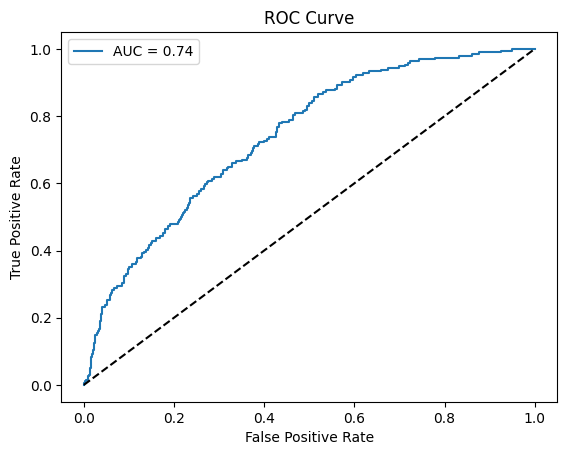

In [37]:
# plot ROC Curve
y_pred_prob = svm_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()